## Note
This was just some minor EDA that was done on the data

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# read
df = pd.read_csv('data/5guys_flight_data_preprocessed_not_scaled.csv')
df.head()

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,TAIL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_DEL15,CRS_ELAPSED_TIME,CARRIER_NAME,...,PREVIOUS_AIRPORT,AWND,PRCP,TAVG,WDF2,WSF2,WT03,WT08,DEL_ORIGIN_COUNT,WT_FOG
0,0,27,0,182,14,12,1028,1.0,278.0,15,...,53,12.75,0.53,18.0,300.0,25.9,0.0,1.0,74377.0,1
1,0,27,0,2365,14,3,1011,1.0,169.0,15,...,53,12.75,0.53,18.0,300.0,25.9,0.0,1.0,74377.0,1
2,0,27,0,1481,14,6,600,1.0,173.0,15,...,53,12.75,0.53,18.0,300.0,25.9,0.0,1.0,74377.0,1
3,0,27,0,2401,14,3,851,0.0,169.0,15,...,53,12.75,0.53,18.0,300.0,25.9,0.0,1.0,74377.0,1
4,0,27,0,2941,14,12,754,1.0,281.0,15,...,53,12.75,0.53,18.0,300.0,25.9,0.0,1.0,74377.0,1


### Distribution of our Features

array([[<Axes: title={'center': 'MONTH'}>,
        <Axes: title={'center': 'DAY_OF_MONTH'}>,
        <Axes: title={'center': 'DAY_OF_WEEK'}>,
        <Axes: title={'center': 'TAIL_NUM'}>,
        <Axes: title={'center': 'ORIGIN'}>],
       [<Axes: title={'center': 'DEST'}>,
        <Axes: title={'center': 'CRS_DEP_TIME'}>,
        <Axes: title={'center': 'DEP_DEL15'}>,
        <Axes: title={'center': 'CRS_ELAPSED_TIME'}>,
        <Axes: title={'center': 'CARRIER_NAME'}>],
       [<Axes: title={'center': 'NUMBER_OF_SEATS'}>,
        <Axes: title={'center': 'PLANE_AGE'}>,
        <Axes: title={'center': 'SEGMENT_NUMBER'}>,
        <Axes: title={'center': 'PREVIOUS_AIRPORT'}>,
        <Axes: title={'center': 'AWND'}>],
       [<Axes: title={'center': 'PRCP'}>,
        <Axes: title={'center': 'TAVG'}>,
        <Axes: title={'center': 'WDF2'}>,
        <Axes: title={'center': 'WSF2'}>,
        <Axes: title={'center': 'WT03'}>],
       [<Axes: title={'center': 'WT08'}>,
        <Axes: title=

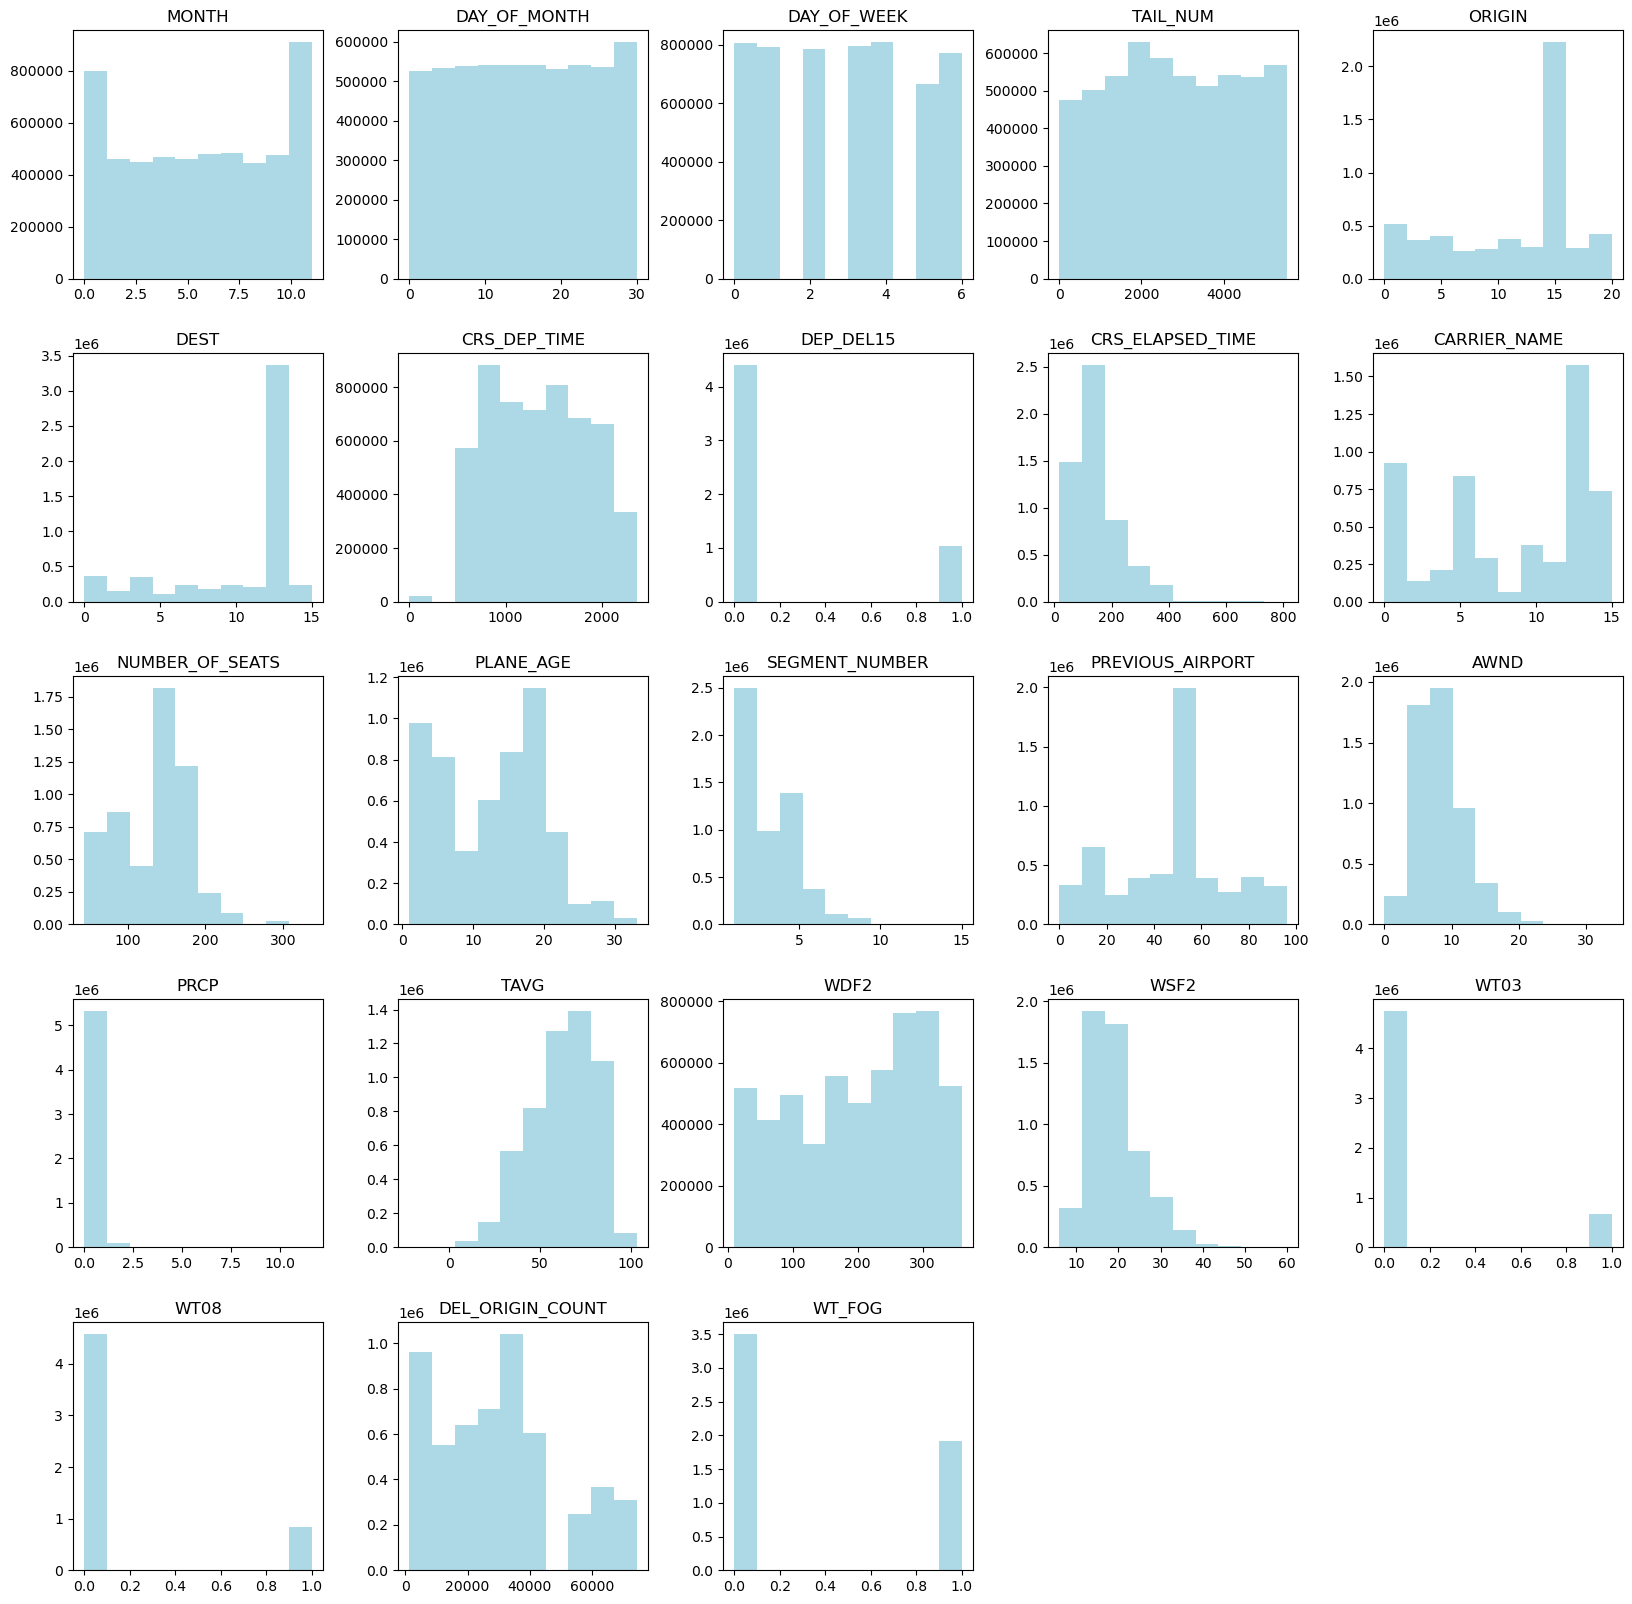

In [8]:
df.hist(figsize=(20, 20), color='lightblue', grid=False);

### Distribution of our Target Variable

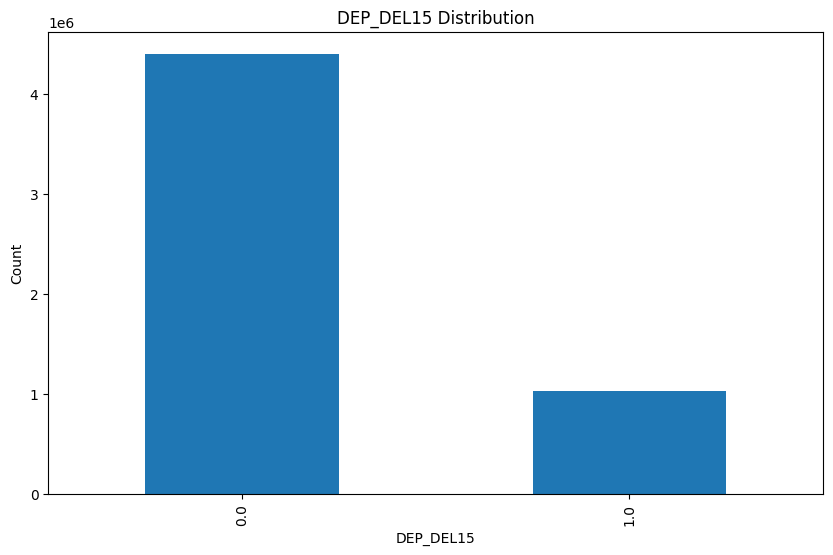

In [23]:
# bar chart of DEP_DEL15
df['DEP_DEL15'].value_counts().plot(kind='bar', figsize=(10, 6))
plt.xlabel("DEP_DEL15")
plt.ylabel("Count")
plt.title("DEP_DEL15 Distribution");\
plt.show()

### Correlation Heatmap of our Features

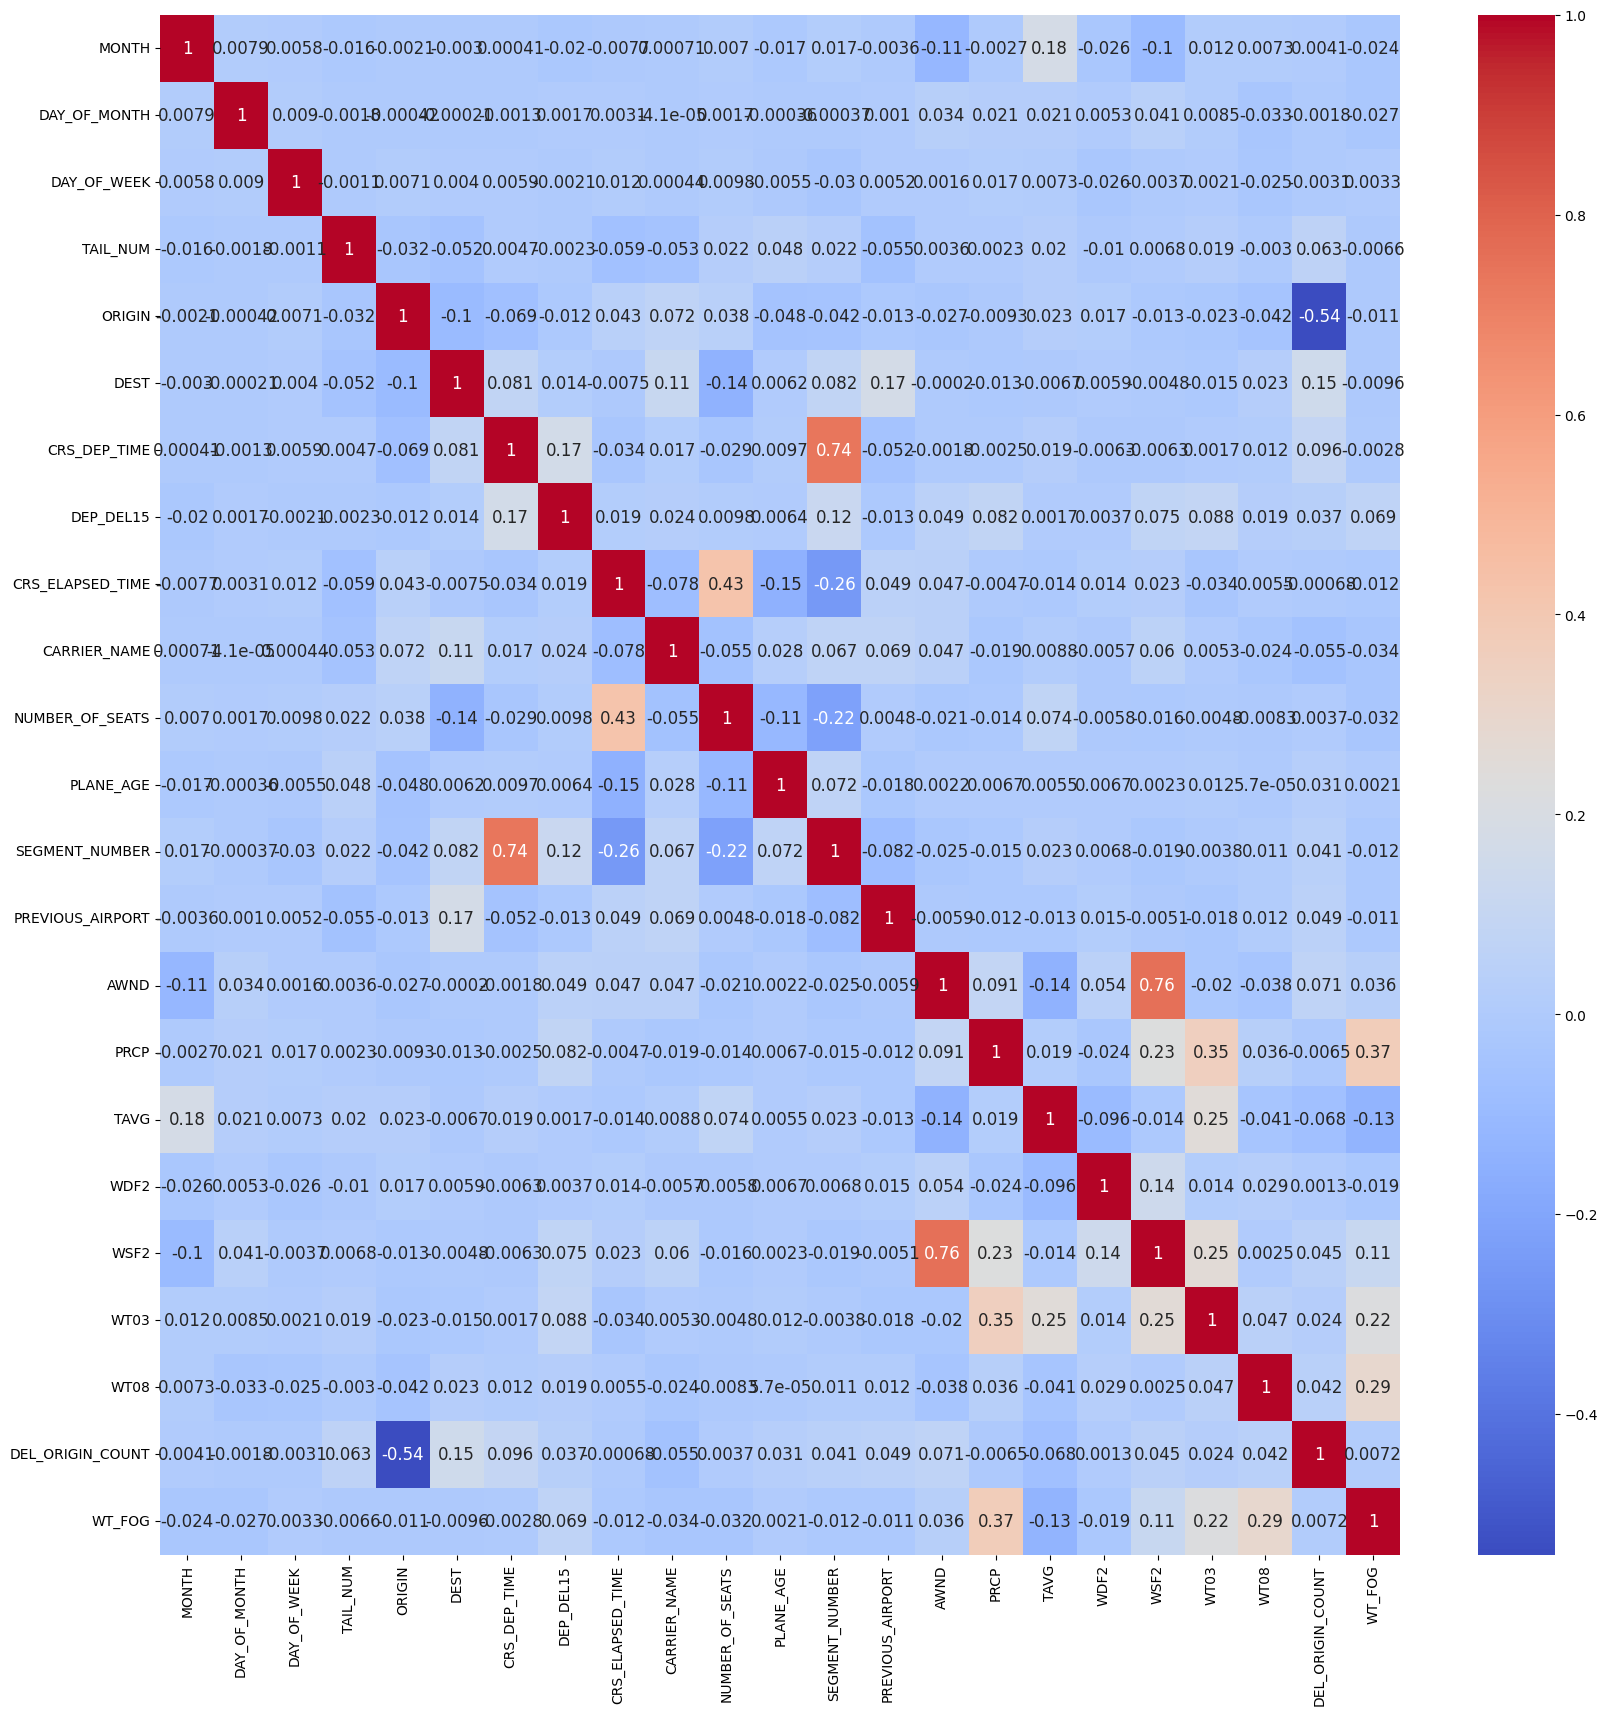

In [25]:
corr = df.corr()
plt.figure(figsize=(20, 20))
sns.heatmap(corr, annot=True, cmap='coolwarm', annot_kws={'size': 12})
plt.show()

### Correlation Heatmap to the Target Variable 'DEP_DEL15'

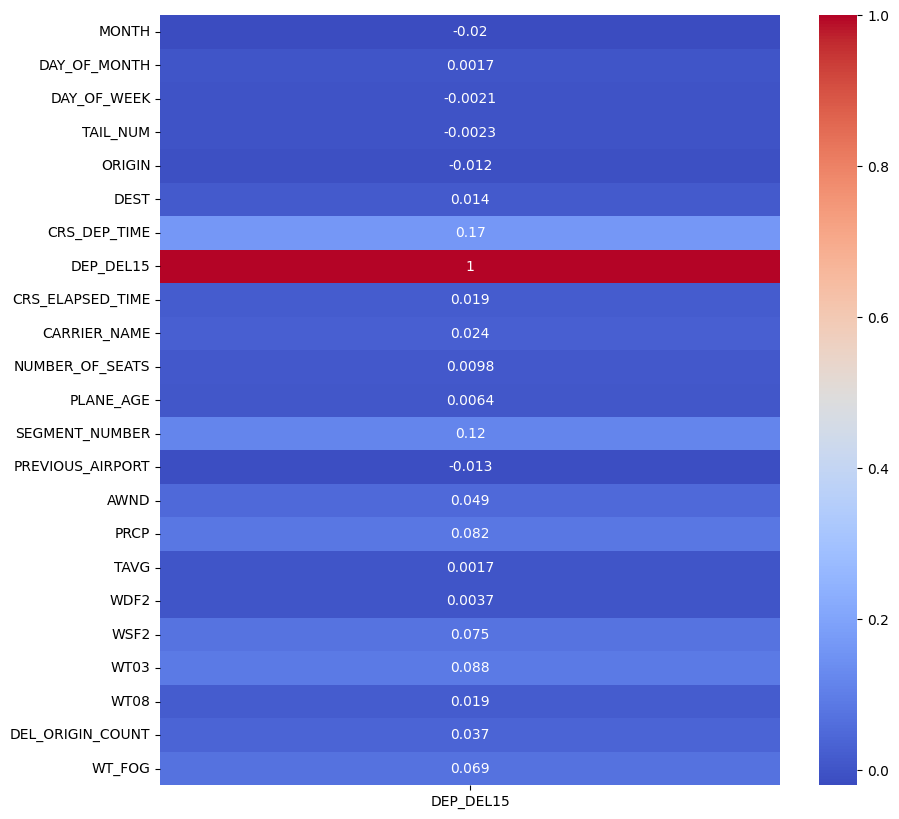

In [3]:
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr()[['DEP_DEL15']], annot=True, cmap='coolwarm')
plt.show()

## Top 3 important features
The degree of importance of a feature is discovered after training on our RandomForestClassifier model. The top 3 features are:
1. CRS_DEP_TIME      = Planned Arrival Time
2. SEGMENT_NUMBER   = The segment that this tail number is on for the day
3. WT03             = Thunder

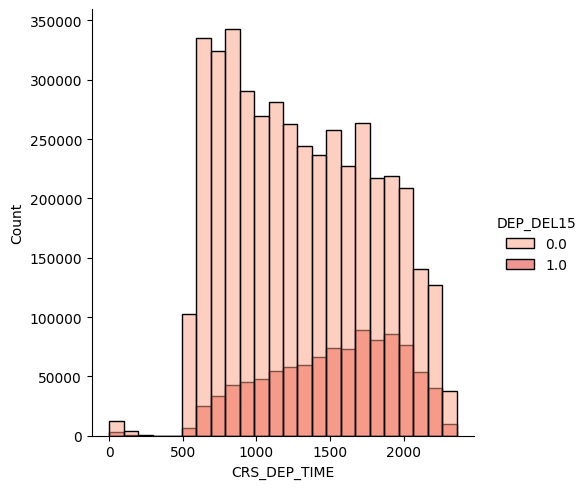

In [4]:
sns.displot(df, x='CRS_DEP_TIME', hue='DEP_DEL15', palette='Reds', bins=24)
plt.show()

/Users/ignatiocalvin/anaconda3/envs/cv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ignatiocalvin/anaconda3/envs/cv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ignatiocalvin/anaconda3/envs/cv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ignatiocalvin/anaconda3/envs/cv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be r

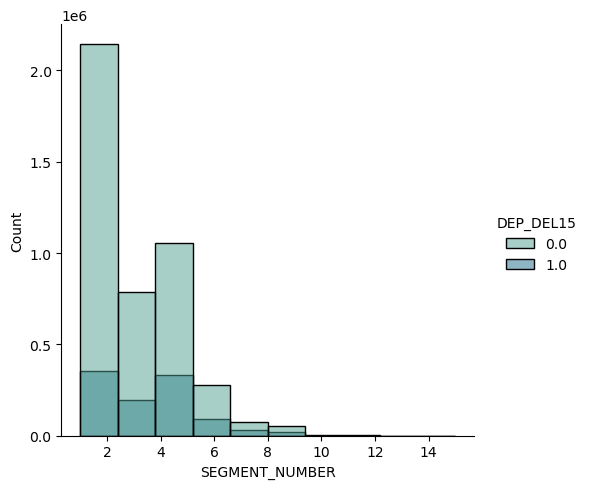

In [11]:
sns.displot(df, x='SEGMENT_NUMBER', hue='DEP_DEL15', palette='crest', bins=10);
plt.show();

/Users/ignatiocalvin/anaconda3/envs/cv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ignatiocalvin/anaconda3/envs/cv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ignatiocalvin/anaconda3/envs/cv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ignatiocalvin/anaconda3/envs/cv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be r

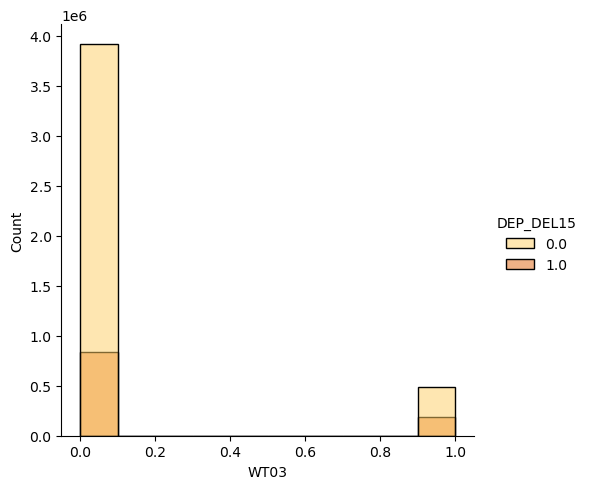

In [12]:
sns.displot(df, x='WT03', hue='DEP_DEL15', palette='YlOrBr', bins=10);
plt.show();